## <font color='orange'>Import libraries</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import random
import glob as gb
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense,Dropout,Conv2D
from tensorflow.keras.utils import plot_model

# gui 
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog
from PIL import Image, ImageTk

d:\education\BFCAI 3rd\2nd Term\Neural Network\Sections\Coding\envs\neural\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\education\BFCAI 3rd\2nd Term\Neural Network\Sections\Coding\envs\neural\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\education\BFCAI 3rd\2nd Term\Neural Network\Sections\Coding\envs\neural\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_q

## <font color='orange'>This function to load data from paths</font>

In [2]:
img_size = 150
binary_classifciation= {'benign': 0, 'malignant': 1}

def loading_data(path):
    _images = []
    _labels = []
    
    for folder in os.listdir(path): #benign, malignant
        folder_path = os.path.join(path, folder) # melanoma_cancer_dataset/train/benign/*. #### melanoma_cancer_dataset/train/malignant
        data = gb.glob(pathname=str(folder_path + '/*.jpg')) #use glob to get all images with exitnation jpg
        
        if(folder=='benign'):
            print(f'benign: {len(data)}')
        else:
            print(f'malignant: {len(data)}')
            
        for img_path in tqdm(data):
            img = cv2.imread(img_path) # read image and return numpy array
            img = cv2.resize(img, (img_size, img_size))
            _images.append(img)
            _labels.append(binary_classifciation[folder])
    return _images,_labels

## <font color='orange'>Get training data </font>

In [3]:
#train_data = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train'

train_data = "D:\\education\\BFCAI 3rd\\2nd Term\\Neural Network\\Project\\melanoma_cancer_dataset\\train\\"
train_images,train_labels = loading_data(train_data)

benign: 4900


100%|██████████| 4900/4900 [00:26<00:00, 183.65it/s]


malignant: 4505


100%|██████████| 4505/4505 [00:17<00:00, 253.94it/s]


## <font color='orange'>Get testing data</font>

In [4]:
#test_data = '/kaggle/input/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test'

test_data = "D:\\education\\BFCAI 3rd\\2nd Term\\Neural Network\\Project\\melanoma_cancer_dataset\\test\\"
test_images,test_labels = loading_data(test_data)

benign: 500


100%|██████████| 500/500 [00:01<00:00, 312.81it/s]


malignant: 500


100%|██████████| 500/500 [00:01<00:00, 305.24it/s]


## <font color='orange'>Get validation data</font>

In [5]:
validation_data = "D:\\education\\BFCAI 3rd\\2nd Term\\Neural Network\\Project\\melanoma_cancer_dataset\\validation\\"
validation_images,validation_labels = loading_data(validation_data)

benign: 100


100%|██████████| 100/100 [00:00<00:00, 156.70it/s]


malignant: 100


100%|██████████| 100/100 [00:00<00:00, 182.61it/s]


## <font color='orange'>Size of train benign images</font>

In [6]:
size = []
files = gb.glob(pathname= str( train_data +'//benign' + '/*.jpg'))
for file in tqdm(files): 
    image = plt.imread(file)
    size.append(image.shape)

#count each similar size contained in size list to know most common size in images        
pd.Series(size).value_counts()

100%|██████████| 4900/4900 [00:03<00:00, 1317.13it/s]


(300, 300, 3)    4900
dtype: int64

## <font color='orange'>Size of train malignant images</font>

In [7]:
size = []
files = gb.glob(pathname= str( train_data +'//malignant' + '/*.jpg'))
for file in tqdm(files): 
    image = plt.imread(file)
    size.append(image.shape)

#count each similar size contained in size list to know most common size in images        
pd.Series(size).value_counts()

100%|██████████| 4505/4505 [00:03<00:00, 1343.66it/s]


(300, 300, 3)    4505
dtype: int64

## <font color='orange'>This function to gel label(class) of image</font>

In [8]:
def get_label(n) : 
    for key,value in binary_classifciation.items() : 
        if n == value : 
            return key

## <font color='orange'>This function to show number of images from dataset</font>

In [9]:
def Show_images(images,labels):
    random_indexs = random.sample(range(len(images)), 25)#0 => length of train images  25 random numbers in this case 0 => 9605
    print(random_indexs)
    plt.figure(figsize=(15, 15))
    for n in range(25):
        i = random_indexs[n]
        plt.subplot(5, 5, n+1)
        plt.imshow(images[i])
        plt.axis('off')
        label=get_label(labels[i])
        plt.title(label) #Print label of image in top
    plt.show()

### <font color='orange'>Show 25 image for training data</font>

[6728, 2478, 3214, 7644, 8982, 8252, 5577, 8253, 7788, 4698, 7079, 6335, 1764, 8302, 1807, 2430, 5630, 5981, 820, 911, 1656, 8373, 8072, 7231, 8535]


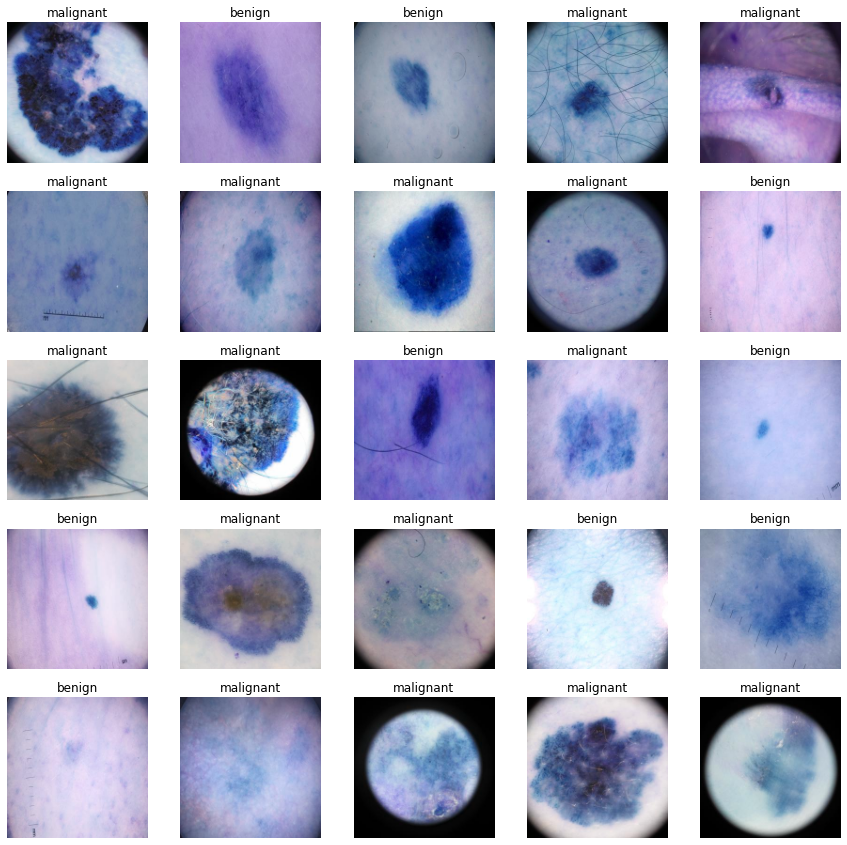

In [10]:
Show_images(train_images,train_labels)

### <font color='orange'>Show 25 image for testing data</font>

[942, 517, 30, 684, 781, 245, 545, 995, 490, 797, 79, 580, 651, 988, 249, 670, 536, 157, 486, 811, 625, 935, 499, 114, 93]


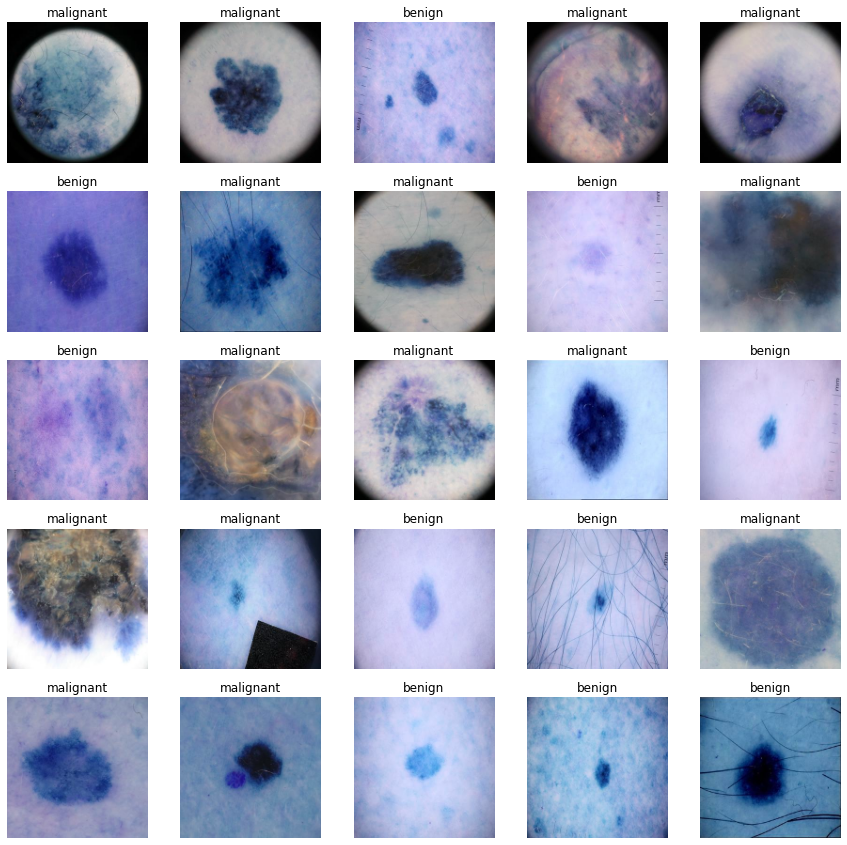

In [11]:
Show_images(test_images,test_labels)

### <font color='orange'>Convert lists to nparrays and show there shapes</font>

In [12]:
train_images = np.asarray(train_images)
test_images = np.asarray(test_images)
validation_images = np.asarray(validation_images)

train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)
validation_labels = np.asarray(validation_labels)

print("Train image Shape: ",train_images.shape)
print("Test image Shape: ",test_images.shape)
print("Validation image Shape: ",validation_images.shape)
print("---------------------------------------------")
print("Train label Shape: ",train_labels.shape)
print("Test label Shape: ",test_labels.shape)
print("Validation label Shape: ",validation_labels.shape)

Train image Shape:  (9405, 150, 150, 3)
Test image Shape:  (1000, 150, 150, 3)
Validation image Shape:  (200, 150, 150, 3)
---------------------------------------------
Train label Shape:  (9405,)
Test label Shape:  (1000,)
Validation label Shape:  (200,)


### <font color='orange'>Normalize values</font>

In [13]:
train_images = train_images/255.0
#print(train_images[0])

In [14]:
test_images = test_images/255.0
validaton_images = validation_images/255.0

## <font color='orange'>Model Creation</font>

In [15]:
def create_model():
    model = Sequential([
        Convolution2D(64, 3, 3, activation='relu',input_shape=(img_size,img_size,3)),
        MaxPooling2D(pool_size=(2, 2)),
        Convolution2D(64, 3, 3, activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [16]:
model = create_model()

In [22]:
checkpoint_path = 'skin_cancer_detector.h5'

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor='loss',
                                                 mode='min',
                                                 verbose=1)

history = model.fit(train_images, train_labels, epochs=10,batch_size=1,callbacks=[cp_callback],validation_data=(validaton_images,validation_labels))

Train on 9405 samples, validate on 200 samples
Epoch 1/10
9405/9405 [==============================] - 60s 6ms/step - loss: 0.1991 - acc: 0.9208 - val_loss: 0.2889 - val_acc: 0.8800

Epoch 00001: loss improved from inf to 0.19913, saving model to skin_cancer_detector.h5
Epoch 2/10
9405/9405 [==============================] - 54s 6ms/step - loss: 0.1913 - acc: 0.9220 - val_loss: 0.2310 - val_acc: 0.8900

Epoch 00002: loss improved from 0.19913 to 0.19129, saving model to skin_cancer_detector.h5
Epoch 3/10
9405/9405 [==============================] - 47s 5ms/step - loss: 0.1867 - acc: 0.9264 - val_loss: 0.1887 - val_acc: 0.9200

Epoch 00003: loss improved from 0.19129 to 0.18672, saving model to skin_cancer_detector.h5
Epoch 4/10
9405/9405 [==============================] - 47s 5ms/step - loss: 0.1852 - acc: 0.9298 - val_loss: 0.2105 - val_acc: 0.9200

Epoch 00004: loss improved from 0.18672 to 0.18520, saving model to skin_cancer_detector.h5
Epoch 5/10
9405/9405 [=======================

In [23]:
val_loss, val_acc = model.evaluate(test_images, test_labels)
print(val_loss)
print(val_acc)

1000/1000 [==============================] - 6s 6ms/step
0.334915588430129
0.905


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
__________

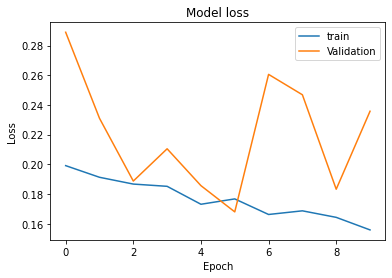

In [25]:
# Plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


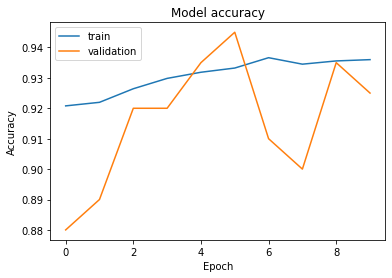

In [26]:
# Plot accuracy
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## <font color='orange'>Create new model to load data</font>

In [27]:
new_model = create_model()

In [28]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 50, 50, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               131200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

## <font color='orange'>evalute new model after loading weights</font>

In [29]:
checkpoint_path = 'skin_cancer_detector.h5'
# Load weights of old model
new_model.load_weights(checkpoint_path)

## <font color='orange'>Get Predicted data</font>

In [30]:
pred_data = "D:\\education\\BFCAI 3rd\\2nd Term\\Neural Network\\Project\\melanoma_cancer_dataset\\predict\\"
pred_images = []

for folder in os.listdir(pred_data): #benign, malignant
    folder_path = os.path.join(pred_data, folder) # melanoma_cancer_dataset/predict/benign #### melanoma_cancer_dataset/predict/malignant
    data = gb.glob(pathname=str(folder_path + '/*.jpg')) #use glob to get all images with exitnation jpg
    if(folder=='benign'):
        print(f'benign: {len(data)}')
    else:
        print(f'malignant: {len(data)}')
    for img_path in tqdm(data):
        img = cv2.imread(img_path) # read image and return numpy array
        img = cv2.resize(img, (img_size, img_size))
        pred_images.append(img)

benign: 500


100%|██████████| 500/500 [00:03<00:00, 125.62it/s]


malignant: 500


100%|██████████| 500/500 [00:03<00:00, 144.41it/s]


In [31]:
pred_images = np.asarray(pred_images)
pred_images = pred_images/255.0

In [32]:
print("Predict image Shape: ",pred_images.shape)

Predict image Shape:  (1000, 150, 150, 3)


## <font color='orange'>Predicted data</font>

In [33]:
# y_labels=new_model.predict(test_images)
# print('Predicted data Shape: ',y_labels.shape)
# y_labels = np.round(y_labels)

In [34]:
pred_labels=new_model.predict(pred_images)
print('Predicted data Shape: ',pred_labels.shape)
pred_labels = np.round(pred_labels)

Predicted data Shape:  (1000, 1)


### <font color='orange'>Show 25 image for predicting data</font>

In [35]:
pred_x,pred_y = loading_data("D:\\education\\BFCAI 3rd\\2nd Term\\Neural Network\\Project\\melanoma_cancer_dataset\\predict\\")

benign: 500


100%|██████████| 500/500 [00:00<00:00, 626.67it/s]


malignant: 500


100%|██████████| 500/500 [00:00<00:00, 817.56it/s]


[612, 414, 766, 823, 764, 430, 182, 266, 85, 389, 877, 462, 771, 153, 204, 598, 565, 795, 371, 605, 583, 453, 789, 739, 316]


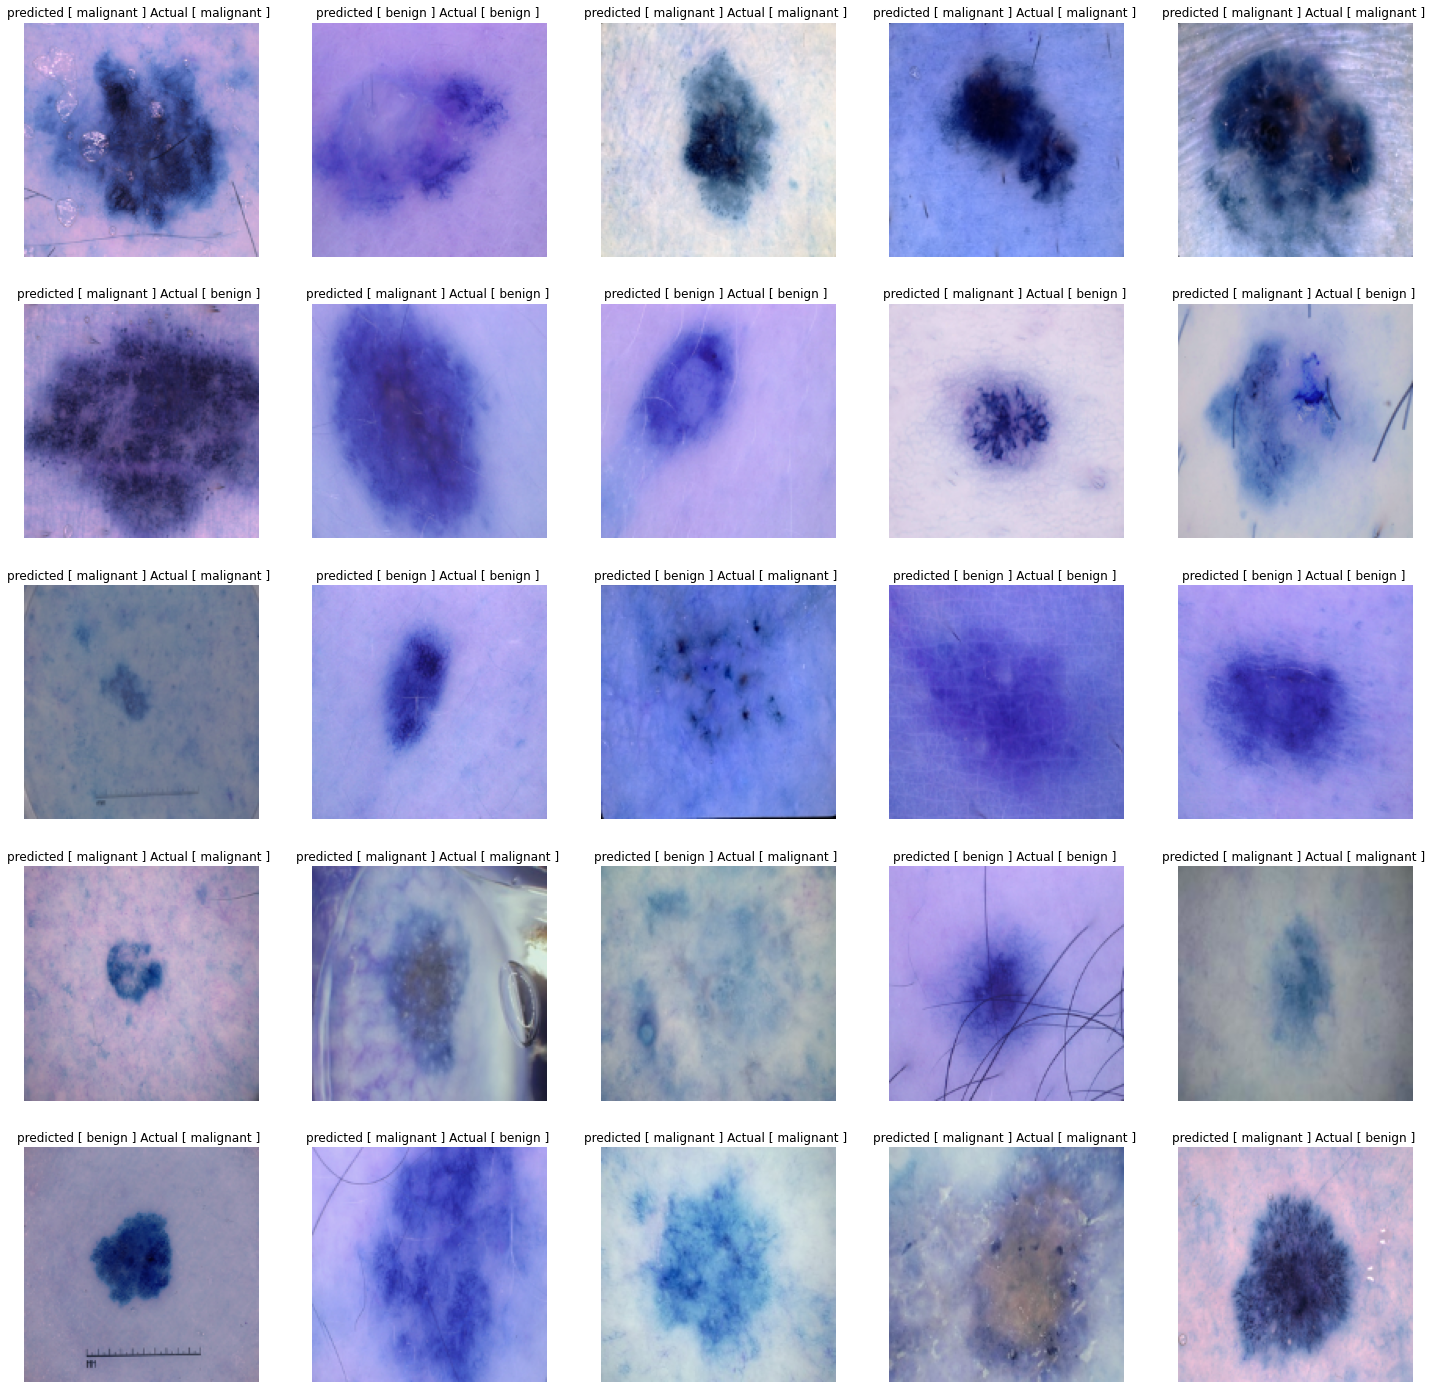

In [36]:
random_indexs = random.sample(range(len(pred_images)), 25)#0 => length of train images  25 random numbers in this case 0 => 1000
print(random_indexs)
plt.figure(figsize=(25, 25))
for n in range(25):
    i = random_indexs[n]
    plt.subplot(5, 5, n+1)
    plt.imshow(pred_images[i])
    plt.axis('off')
    label=get_label(pred_labels[i])
    # plt.title(label)
    plt.title(f'predicted [ {get_label(pred_labels[i])} ] Actual [ {get_label(pred_y[i])} ] ') #Print label of image in top
plt.show()

### <font color='orange'>Chart to compare between Test and Predict labels</font>

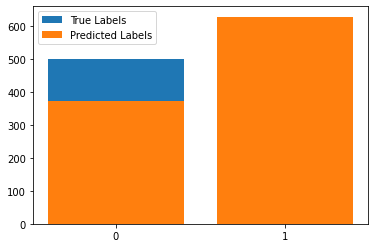

In [37]:

# Get the counts of each class in the test data and the predicted data
unique, counts_test = np.unique(pred_y, return_counts=True) # unqiue of class [0,1] count_test = number of images in one class
unique, counts_pred = np.unique(pred_labels, return_counts=True) # unqiue of class [0,1] count_predict = number of images in one class

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(unique, counts_test, label='True Labels')
ax.bar(unique, counts_pred, label='Predicted Labels')
ax.set_xticks(unique)
ax.legend()
plt.show()

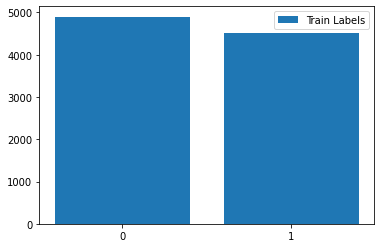

In [38]:
unqiue, count_train = np.unique(train_labels,return_counts=True) # unqiue of class [0,1] count_train = number of images in one class
fig,ax = plt.subplots()
ax.bar(unique,count_train,label='Train Labels')
ax.set_xticks(unqiue)
ax.legend()
plt.show()

In [39]:
from sklearn.metrics import classification_report
print(classification_report(pred_y, pred_labels))

              precision    recall  f1-score   support

           0       0.77      0.57      0.65       500
           1       0.66      0.83      0.73       500

    accuracy                           0.70      1000
   macro avg       0.71      0.70      0.69      1000
weighted avg       0.71      0.70      0.69      1000



In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred_y, pred_labels))

[[285 215]
 [ 87 413]]


In [58]:
# Need different verison
#plot_model(model, to_file='model.png',show_shapes=True)

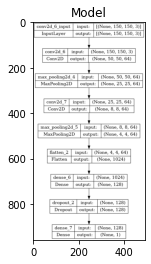

In [41]:
img = cv2.imread(f'D://education//BFCAI 3rd//2nd Term//Neural Network//Sections//jupyter//code//Project//model.png')
plt.imshow(img)
plt.title("Model")
plt.show() # display

# <font color='orange'>GUI</font>

In [42]:
photo_path = ''
result = ''

In [48]:
# Create the root window
root = tk.Tk()
root.title("Skin Cancer Model")
root.configure(background='skyblue')
# Get the screen width and height
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()

# Calculate the x and y positions to center the frame
x = (screen_width/2) - (500/2)
y = (screen_height/2) - (400/2)

# Set the size and position of the root window
root.geometry("500x400+{}+{}".format(int(x), int(y)))

def load_image():
    # select an image file
    filename = filedialog.askopenfilename(filetypes=[("Image Files", "*.jpg;")])
    global photo_path 
    photo_path = filename
    img = Image.open(filename)
    img = img.resize((200, 200), Image.ANTIALIAS)

    # Convert the image to PhotoImage format
    photo = ImageTk.PhotoImage(img)
    
    photo_label.config(image=photo)
    photo_label.image = photo

def load_diagnosis():
    img = cv2.imread(photo_path)
    img = cv2.resize(img,(img_size, img_size))
    img = np.array(img)
    # img = img.reshape(200,200,3)
    img = img/255.0
    # img = np.expand_dims(img, axis=0) # add a new axis for the batch size
    img = np.reshape(img, (1, img_size, img_size, 3)) # reshape to the expected input shape

    pred=model.predict(img)
    pred = np.round(pred)
    global result
    result = get_label(pred) #f'predicted [ {get_label(pred_labels)} ] Actual [ {get_label(test_labels)} ] ' #Print label of image in top
    print (result)
    if result == 'benign':
        output_label = ttk.Label(root, text=result,foreground='green', font=("Helvetica", 14),background='skyblue')
    else:
        output_label = ttk.Label(root, text=result,foreground='red', font=("Helvetica", 14),background='skyblue')
    output_label.pack(pady=10)


# Create the photo field
photo_label = ttk.Label(root,background='skyblue')
photo_label.pack(pady=10)

# Create the button
button = ttk.Button(root, text="Select Image", command=load_image)
button.pack(pady=10)

# Create the button
button = ttk.Button(root, text="Check",command=load_diagnosis)
button.pack(pady=10)


# Start the main loop
root.mainloop()


malignant


### <font color='orange'>VGG16</font>

In [37]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential

batch_size = 1
epochs = 2
img_size = 160

# Create the ImageDataGenerators for train and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Specify the directories for train and validation data
train_dir = "D:\\education\\BFCAI 3rd\\2nd Term\\Neural Network\\Project\\melanoma_cancer_dataset\\train\\"
validation_dir = "D:\\education\\BFCAI 3rd\\2nd Term\\Neural Network\\Project\\melanoma_cancer_dataset\\validation\\"

# Create the DirectoryIterators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)

# Load the VGG16 model with pre-trained weights
base_model = VGG16(input_shape=(img_size, img_size, 3), include_top=False)
# base_model.trainable = False

# Create the model architecture
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation='sigmoid'))
for layer in model.layers[:-1]:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Found 9405 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [38]:
# Train the model with batch-wise training
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/2
9405/9405 [==============================] - 1401s 149ms/step - loss: 0.4420 - acc: 0.8023 - val_loss: 0.3683 - val_acc: 0.8600
Epoch 2/2
9405/9405 [==============================] - 1435s 153ms/step - loss: 0.3683 - acc: 0.8404 - val_loss: 0.3343 - val_acc: 0.8550


In [3]:
import tkinter as tk
from tkinter import filedialog
from PIL import ImageTk, Image
import numpy as np
import tensorflow.keras as keras

# Create the Tkinter GUI
root = tk.Tk()

# Function to open and predict an image
def open_image():
    # Open a file dialog to select an image
    file_path = filedialog.askopenfilename()
    
    # Load the image using PIL
    image = Image.open(file_path)
    image = image.resize((s, s))
    
    # Convert the image to a numpy array
    image_array = np.array(image) / 255.0
    
    # Add a dimension for batch size
    image_array = np.expand_dims(image_array, axis=0)
    
    # Predict the image using the model
    prediction = KerasModel.predict(image_array)
    class_index = np.argmax(prediction)
    class_name = class_names[class_index]
    
    # Display the image and prediction result
    image.thumbnail((200, 200))
    image_tk = ImageTk.PhotoImage(image)
    image_label.configure(image=image_tk)
    image_label.image = image_tk
    prediction_label.configure(text=f"Predicted Class: {class_name}")

# Create a button to open an image
open_button = tk.Button(root, text="Open Image", command=open_image)
open_button.pack()

# Create a label to display the image
image_label = tk.Label(root)
image_label.pack()

# Create a label to display the prediction result
prediction_label = tk.Label(root)
prediction_label.pack()

# Run the Tkinter event loop
root.mainloop()


d:\education\BFCAI 3rd\2nd Term\Neural Network\Sections\Coding\envs\neural\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\education\BFCAI 3rd\2nd Term\Neural Network\Sections\Coding\envs\neural\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\education\BFCAI 3rd\2nd Term\Neural Network\Sections\Coding\envs\neural\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_q